In [ ]:
from google.colab import drive
drive.mount('/drive')


Mounted at /drive


In [ ]:
import pandas as p
import numpy as np
true_data = p.read_csv('/drive/My Drive/archive/True.csv')#import true data
fake_data = p.read_csv('/drive/My Drive/archive/Fake.csv')#import fake data
true_data['fake'] = 0 # Creating default column
fake_data['fake'] = 1 # Creating default column
news_data = p.concat([true_data,fake_data])
news_data = news_data.sample(frac=1.0).reset_index(drop=True) # Shuffling the data

In [ ]:
!pip install texthero # Installing TextHero
!pip install -U spacy

     |████████████████████████████████| 1.5 MB 15.1 MB/s 
     |████████████████████████████████| 235 kB 77.1 MB/s 
     |████████████████████████████████| 749 kB 63.1 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5
     |████████████████████████████████| 6.0 MB 13.9 MB/s 
     |████████████████████████████████| 42 kB 1.9 MB/s 
     |████████████████████████████████| 181 kB 82.2 MB/s 
     |████████████████████████████████| 628 kB 65.9 MB/s 
     |████████████████████████████████| 10.1 MB 64.9 MB/s 
     |████████████████████████████████| 451 kB 65.4 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attemp

In [ ]:
import texthero as hero # Importing TextHero
news_data['text'] = hero.lowercase(news_data['text'])
news_data['text'] = hero.remove_digits(news_data['text']) # To remove digits
news_data['text'] = hero.remove_punctuation(news_data['text']) # To remove punctuations
news_data['text'] = hero.remove_diacritics(news_data['text']) # To remove diacritics
# To remove any form of brackets

news_data['text'] = hero.remove_brackets(news_data['text'])
news_data['text'] = hero.remove_angle_brackets(news_data['text'])
news_data['text'] = hero.remove_curly_brackets(news_data['text'])
news_data['text'] = hero.remove_round_brackets(news_data['text'])
news_data['text'] = hero.remove_square_brackets(news_data['text'])
hero.top_words(news_data['text'])[:10]
news_data['text'] = hero.remove_stopwords(news_data['text'])
hero.top_words(news_data['text'])[:10] # Stop words have been removed, but there still seems to have unwanted characters
news_data['text'] = hero.remove_punctuation(news_data['text'])
news_data['text'] = hero.remove_whitespace(news_data['text'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.7/dist-packages/spacy/util.py:841: UserWarning:

[W094] Model 'en_core_web_sm' (2.2.5) specifies an under-constrained spaCy version requirement: >=2.2.2. This can lead to compatibility problems with older versions, or as new spaCy versions are released, because the model may say it's compatible when it's not. Consider changing the "spacy_version" in your meta.json to a version range, with a lower and upper pin. For example: >=3.2.0,<3.3.0



✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
news_data['text'] = news_data['text'].apply(lambda x: ' '.join([WordNetLemmatizer().lemmatize(word) for word in x.split()]))


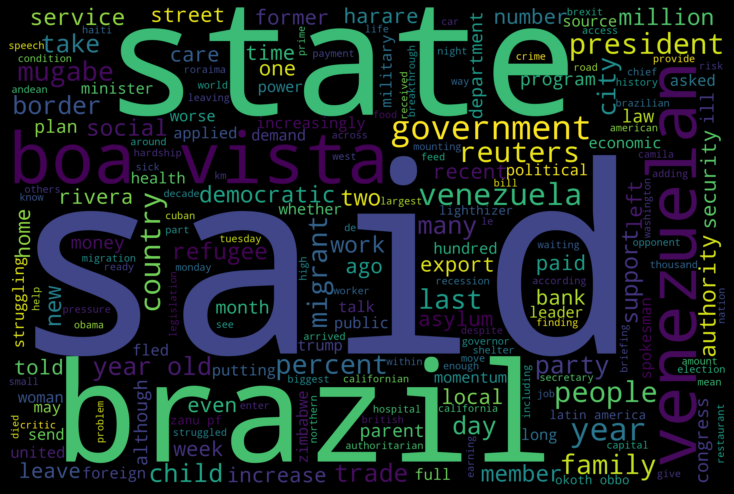

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(news_data.loc[news_data.fake == 0,"text"].values))
    
fig = plt.figure(
    figsize = (10, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


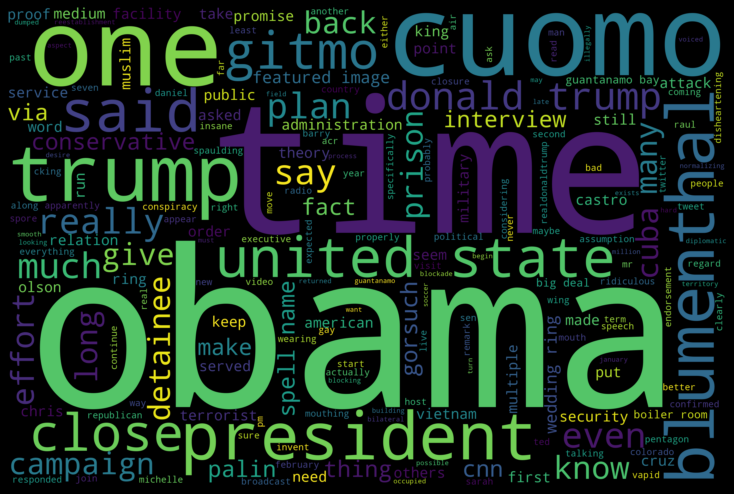

In [ ]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(news_data.loc[news_data.fake == 1,"text"].values))
    
fig = plt.figure(
    figsize = (10, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
y=news_data['fake'].values
X=news_data['text'].values
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# several commonly used vectorizer setting

#  unigram boolean vectorizer, set minimum document frequency to 5
unigram_bool_vectorizer = CountVectorizer(encoding='latin-1', binary=True, min_df=5, stop_words='english')

#  unigram term frequency vectorizer, set minimum document frequency to 5
unigram_count_vectorizer = CountVectorizer(encoding='latin-1', binary=False, min_df=5, stop_words='english')

#  unigram and bigram term frequency vectorizer, set minimum document frequency to 5
gram12_count_vectorizer = CountVectorizer(encoding='latin-1', ngram_range=(1,2), min_df=5, stop_words='english')

#  unigram tfidf vectorizer, set minimum document frequency to 5
unigram_tfidf_vectorizer = TfidfVectorizer(encoding='latin-1', use_idf=True, min_df=5, stop_words='english')

In [ ]:
X_vec1=unigram_count_vectorizer.fit_transform(X)
X_vec2=unigram_bool_vectorizer.fit_transform(X)
X_vec3=unigram_tfidf_vectorizer.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, X_train1, X_test1,X_train2, X_test2,X_train3, X_test3,  y_train, y_test = train_test_split(X, X_vec1,X_vec2, X_vec3, y, test_size=0.5, random_state=0)

In [ ]:
from sklearn.svm import LinearSVC

# initialize the LinearSVC model
svm_clf1 = LinearSVC(C=1000000)
svm_clf2 = LinearSVC(C=1000000)
svm_clf3 = LinearSVC(C=1000000)

# use the training data to train the model
svm_clf1.fit(X_train1,y_train)
svm_clf2.fit(X_train2,y_train)
svm_clf3.fit(X_train3,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



LinearSVC(C=1000000)

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred1 = svm_clf1.predict(X_test1)
y_pred2 = svm_clf2.predict(X_test2)
y_pred3 = svm_clf3.predict(X_test3)
cm1=confusion_matrix(y_test, y_pred1, labels=[0,1])
cm2=confusion_matrix(y_test, y_pred2, labels=[0,1])
cm3=confusion_matrix(y_test, y_pred3, labels=[0,1])


from sklearn.metrics import classification_report
target_names = ['0','1']
print(cm1)
print(cm2)
print(cm3)
print(classification_report(y_test, y_pred1, target_names=target_names))
print(classification_report(y_test, y_pred2, target_names=target_names))
print(classification_report(y_test, y_pred3, target_names=target_names))

[[10573    77]
 [   96 11703]]
[[10632    18]
 [   60 11739]]
[[10555    95]
 [  122 11677]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     10650
           1       0.99      0.99      0.99     11799

    accuracy                           0.99     22449
   macro avg       0.99      0.99      0.99     22449
weighted avg       0.99      0.99      0.99     22449

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     10650
           1       1.00      0.99      1.00     11799

    accuracy                           1.00     22449
   macro avg       1.00      1.00      1.00     22449
weighted avg       1.00      1.00      1.00     22449

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     10650
           1       0.99      0.99      0.99     11799

    accuracy                           0.99     22449
   macro avg       0.99      0.99  

In [ ]:
## interpreting LinearSVC models
## http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

## LinearSVC uses a one-vs-all strategy to extend the binary SVM classifier to multi-class problems
## for the Kaggle sentiment classification problem, there are five categories 0,1,2,3,4 with 0 as very negative and 4 very positive
## LinearSVC builds five binary classifier, "very negative vs. others", "negative vs. others", "neutral vs. others", "positive vs. others", "very positive vs. others", 
## and then pick the most confident prediction as the final prediction.

## Linear SVC also ranks all features based on their contribution to distinguish the two concepts in each binary classifier
## For category "0" (very negative), get all features and their weights and sort them in increasing order
feature_ranks0 = sorted(zip(svm_clf1.coef_[0], unigram_tfidf_vectorizer.get_feature_names()))



## get the 10 features that are best indicators of very negative sentiment (they are at the bottom of the ranked list)
truth10 = feature_ranks0[-10:]


print("true news")
for i in range(0, len(truth10)):
    print(truth10[i])
print()





true news
(0.17441103969191932, 'hosting')
(0.18893948082596707, 'getty')
(0.19108475568345412, 'cia')
(0.19112007827259872, 'sachs')
(0.19792590549234626, 'ipsos')
(0.21131666370753988, 'adler')
(0.2116182494950591, 'odd')
(0.24451151940661886, 'featured')
(0.24607289034750868, 'image')
(0.27578685154299737, 'read')



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [ ]:
err_cnt1 = 0
fakeastrue1=0
trueasfake1=0
for i in range(0, len(y_test)):
    if(y_test[i]!= y_pred2[i]):
        print(X_test[i])
        err_cnt1 = err_cnt1+1
print("errors1:", err_cnt1)
for i in range(0, len(y_test)):
    if(y_test[i]> y_pred2[i]):
        print(X_test[i])
        fakeastrue1 = fakeastrue1+1
print("fakeastrue1 errors:", fakeastrue1)
for i in range(0, len(y_test)):
    if(y_test[i]< y_pred2[i]):
        print(X_test[i])
        trueasfake1 = trueasfake1+1
print("trueasfake1 errors", trueasfake1)

gosh wonder clinton foundation come fire past foreign donation previous donor kingdom saudi arabia given million million since foundation created question ethic donation possibly curry favor clinton omission lot lot money clinton foundation failed report million donation government internal revenue service newly refiled tax return show reuters reported foundation disclosed million received government foreign spin organization refiled tax return six year fix error bill hillary chelsea clinton foundation previously separate donation government old tax return mandated irs foundation refiled tax return charity spun foundation clinton health access initiative refiled return found made error reporting fund foreign government revelation inaccuracy came hillary clinton democratic candidate president endured scrutiny million dollar family foundation received foreign government via wfb
new york ifr jared kushner divested equity interest fifth avenue story office retail building manhattan famed s

In [ ]:
# import the MNB module
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

# initialize the MNB model
nb_clf1= MultinomialNB()
nb_clf2= MultinomialNB()
nb_clf3= MultinomialNB()

# use the training data to train the MNB model
# feature_log_prob_ stores the conditional probs for all categories
# if the labels are strings, the index is in alphabetic order
# e.g. 'f' comes before 't' in alphabet, so 'f' is in [0] dimension and 't' in [1]

nb_clf1.fit(X_train1,y_train)
nb_clf2.fit(X_train2,y_train)
nb_clf3.fit(X_train3,y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred4 = nb_clf1.predict(X_test1)
y_pred5 = nb_clf2.predict(X_test2)
y_pred6 = nb_clf3.predict(X_test3)
cm4=confusion_matrix(y_test, y_pred4, labels=[0,1])
cm5=confusion_matrix(y_test, y_pred5, labels=[0,1])
cm6=confusion_matrix(y_test, y_pred6, labels=[0,1])


from sklearn.metrics import classification_report
target_names = ['0','1']
print(cm4)
print(cm5)
print(cm6)
print(classification_report(y_test, y_pred4, target_names=target_names))
print(classification_report(y_test, y_pred5, target_names=target_names))
print(classification_report(y_test, y_pred6, target_names=target_names))


[[10102   548]
 [  597 11202]]
[[10244   406]
 [  599 11200]]
[[ 9931   719]
 [  784 11015]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     10650
           1       0.95      0.95      0.95     11799

    accuracy                           0.95     22449
   macro avg       0.95      0.95      0.95     22449
weighted avg       0.95      0.95      0.95     22449

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10650
           1       0.97      0.95      0.96     11799

    accuracy                           0.96     22449
   macro avg       0.95      0.96      0.96     22449
weighted avg       0.96      0.96      0.96     22449

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     10650
           1       0.94      0.93      0.94     11799

    accuracy                           0.93     22449
   macro avg       0.93      0.93  

In [ ]:
## interpreting LinearSVC models
## http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

## LinearSVC uses a one-vs-all strategy to extend the binary SVM classifier to multi-class problems
## for the Kaggle sentiment classification problem, there are five categories 0,1,2,3,4 with 0 as very negative and 4 very positive
## LinearSVC builds five binary classifier, "very negative vs. others", "negative vs. others", "neutral vs. others", "positive vs. others", "very positive vs. others", 
## and then pick the most confident prediction as the final prediction.

## Linear SVC also ranks all features based on their contribution to distinguish the two concepts in each binary classifier
## For category "0" (very negative), get all features and their weights and sort them in increasing order
feature_ranks00 = sorted(zip(nb_clf2.coef_[0], unigram_tfidf_vectorizer.get_feature_names()))



## get the 10 features that are best indicators of very negative sentiment (they are at the bottom of the ranked list)
truth10B = feature_ranks00[-10:]


print("truth factor")
for i in range(0, len(truth10B)):
    print(truth10B[i])
print()





truth factor
(-5.912891726540039, 'say')
(-5.910477591712347, 'state')
(-5.909163243220835, 'donald')
(-5.857749553279017, 'image')
(-5.795865831857947, 'like')
(-5.786527242590148, 'time')
(-5.7749753236004135, 'president')
(-5.688825726718697, 'people')
(-5.588641916932328, 'trump')
(-5.573660953954338, 'said')



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning:

Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [ ]:
err_cnt2 = 0
fakeastrue2=0
trueasfake2=0
for i in range(0, len(y_test)):
    if(y_test[i]!= y_pred5[i]):
        print(X_test[i])
        err_cnt2 = err_cnt2+1
print("errors2:", err_cnt2)
for i in range(0, len(y_test)):
    if(y_test[i]> y_pred5[i]):
        print(X_test[i])
        fakeastrue2 = fakeastrue2+1
print("fakeastrue2 errors:", fakeastrue2)
for i in range(0, len(y_test)):
    if(y_test[i]< y_pred5[i]):
        print(X_test[i])
        trueasfake2 = trueasfake2+1
print("trueasfake2 errors", trueasfake2)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
!git clone -b master https://github.com/charles9n/bert-sklearn
!cd bert-sklearn; pip install .
import os
os.chdir("bert-sklearn")
print(os.listdir())

Cloning into 'bert-sklearn'...
remote: Enumerating objects: 259, done.
remote: Total 259 (delta 0), reused 0 (delta 0), pack-reused 259
Receiving objects: 100% (259/259), 516.15 KiB | 2.11 MiB/s, done.
Resolving deltas: 100% (131/131), done.
Processing /content/bert-sklearn/bert-sklearn/bert-sklearn
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for bert-sklearn: filename=bert_sklearn-0.3.1-py3-none-any.whl size=54247 sha256=ee9e810eb7bfdd5f0608a8b7af44a0728b104a2c9df72ffed576a0362973d573
  Stored in directory: /root/.cache/pip/wheels/4f/97/44/cf1e3f3e53c683f2c32e4312e7e186a6692af1ada6103d1156
Successfully built bert-sklearn
  

In [ ]:
from bert_sklearn import BertClassifier
model1 = BertClassifier()         # text/text pair classification
print(model1)
model1.fit(X_train, y_train)

Building sklearn text classifier...
BertClassifier()


100%|██████████| 231508/231508 [00:00<00:00, 677393.36B/s]


Loading bert-base-uncased model...


100%|██████████| 433/433 [00:00<00:00, 263284.09B/s]


Defaulting to linear classifier/regressor
Loading Pytorch checkpoint

train data size: 20205, validation data size: 2244



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning:

This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



Training  :   0%|          | 0/632 [00:00<?, ?it/s]

/content/bert-sklearn/bert_sklearn/model/pytorch_pretrained/optimization.py:275: UserWarning:

This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  ../torch/csrc/utils/python_arg_parser.cpp:1050.)



Validating:   0%|          | 0/281 [00:00<?, ?it/s]


Epoch 1, Train loss: 0.0516, Val loss: 0.0022, Val accy: 99.96%



Training  :   0%|          | 0/632 [00:00<?, ?it/s]

Validating:   0%|          | 0/281 [00:00<?, ?it/s]


Epoch 2, Train loss: 0.0061, Val loss: 0.0012, Val accy: 99.96%



Training  :   0%|          | 0/632 [00:00<?, ?it/s]

Validating:   0%|          | 0/281 [00:00<?, ?it/s]


Epoch 3, Train loss: 0.0023, Val loss: 0.0016, Val accy: 99.96%



BertClassifier(do_lower_case=True, label_list=array([0, 1]))

In [ ]:
y_pred7 = model1.predict(X_test)
from sklearn.metrics import confusion_matrix

cm7=confusion_matrix(y_test, y_pred7, labels=[0,1])



from sklearn.metrics import classification_report
target_names = ['0','1']
print(cm7)

print(classification_report(y_test, y_pred7, target_names=target_names))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning:

This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



Predicting:   0%|          | 0/2807 [00:00<?, ?it/s]

[[10638    12]
 [   16 11783]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10650
           1       1.00      1.00      1.00     11799

    accuracy                           1.00     22449
   macro avg       1.00      1.00      1.00     22449
weighted avg       1.00      1.00      1.00     22449



In [ ]:
err_cnt3 = 0
trueasfake3=0
fakeastrue3=0
for i in range(0, len(y_test)):
    if(y_test[i]!= y_pred7[i]):
        
        err_cnt3 = err_cnt3+1
print("errors:", err_cnt3)
for i in range(0, len(y_test)):
    if(y_test[i]> y_pred7[i]):
        
        trueasfake3 = trueasfake3+1
print("trueasfake3 errors:", trueasfake3)
for i in range(0, len(y_test)):
    if(y_test[i]< y_pred7[i]):
        print(X_test[i])
        fakeastrue3 = fakeastrue3+1
print("fakeastrue3 errors:", fakeastrue3)

errors: 28
trueasfake3 errors: 16
new york ifr jared kushner divested equity interest fifth avenue story office retail building manhattan famed shopping area according spokesperson kushner company kushner said would step ceo kushner company family owned real estate company begin divest substantial asset made senior white house advisor u president donald trump father law mr kushner divested equity interest fifth avenue role management operation property kushner company spokesperson said emailed statement ifr mr kushner ownership interest sold using third party appraisal fair market value family trust beneficiary spokesperson said neither ivanka trump kushner child beneficiary family trust spokesperson also confirmed asked ifr kushner company declined give detail sale price equity stake declined discus aspect outstanding debt property kushner bought property u 8bn highest price ever paid single office building sale united state time according kroll bond rating agency last valued well lev

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
MAX_NB_WORDS = 10000

tokenizer = keras.preprocessing.text.Tokenizer(MAX_NB_WORDS) # Selecting top 10000 words
tokenizer.fit_on_texts(news_data['text'])
train_data = tokenizer.texts_to_sequences(news_data['text'])

word_index = tokenizer.word_index

In [ ]:
MAX_SEQUENCE_LENGTH = 600
EMBEDDING_DIM = 30
train_data = keras.preprocessing.sequence.pad_sequences(train_data, maxlen=MAX_SEQUENCE_LENGTH)
from sklearn.model_selection import train_test_split

X_train5,X_tes5,y_train5,y_test5 = train_test_split(train_data,news_data['fake'],test_size=0.5)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))


model.add(keras.layers.Bidirectional(keras.layers.LSTM(units=128))) 
model.add(keras.layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()
model.fit(X_train5, y_train5, epochs=5,batch_size=1000, validation_split=0.1,verbose=1)
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train5, y_train5, epochs=5,batch_size=1000, validation_split=0.1,verbose=1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 600, 30)           300000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              162816    
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 463,073
Trainable params: 463,073
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
21/21 [==============================] - 9s 310ms/step - loss: 0.6609 - accuracy: 0.6068 - val_loss: 0.5475 - val_accuracy: 0.7457
Epoch 2/5
21/21 [==============================] - 6s 273ms/step - loss: 0.3745 - accuracy: 0.8860 - val_

702/702 [==============================] - 15s 22ms/step - loss: 0.0682 - accuracy: 0.9780
[0.06820692121982574, 0.9779945611953735]


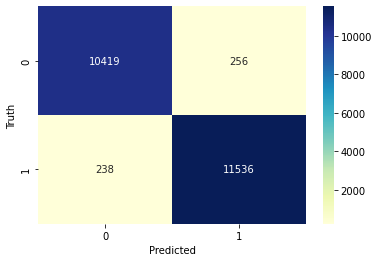

In [ ]:
import seaborn as sns
print(model.evaluate(X_tes5,y_test5, verbose=1))
from sklearn.metrics import confusion_matrix

y_pred8 = model.predict(X_tes5)
y_pred8_labels = [np.round(i) for i in y_pred8]
sns.heatmap(tf.math.confusion_matrix(labels=y_test5,predictions=y_pred8_labels), annot=True, fmt='d',cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [ ]:
Oniontest1=('NEW YORK—In an effort to keep customers apprised of what to expect on their trip, a United Airlines email with the subject line “Information About Your Upcoming Flight” reportedly informed passengers Friday that airplane will go in sky. “You go up, up, up!” read the informational email in part, confirming that sky was up where clouds are. “Sit down in seat on plane and you fly way high in air where are bird and balloon. Whoosh through big blue sky! Yippee!” At press time, the email assured concerned passengers that airplane not go so high that it crash into sun.')
Oniontest2=('PHOENIX—Describing the 15-minute incident as “a nightmare come to life,” local office workers at Martin Realty were reportedly terrorized Friday by an unhinged ex-employee dropping in to say hi. “We always knew he was a bit off by the way he’d say ‘good morning’ and ask about how our weekend was, but we never thought it’d escalate to anything like this,” said administrative assistant Andrea Foder, who was one of several employees who were forced to barricade themselves inside the bathroom as former associate Henry Bassett stalked his way through the office suite, openly carrying a large box of pastries. “He was definitely disgruntled after getting laid off, saying stuff like, ‘I’m really going to miss you guys,’ and, ‘Let’s keep in touch,’ but at the time I chalked it up to the heat of the moment. I guess I should have taken the threat more seriously.” At press time, a rattled Foder stated, “That could have been me,” after learning that Bassett had taken two of her coworkers to lunch.')
Oniontestlist=[Oniontest1, Oniontest2]

model1.predict(Oniontestlist)==1



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning:

This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



Predicting:   0%|          | 0/1 [00:00<?, ?it/s]

array([ True,  True])